In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

from pandas_datareader import data
from scipy.optimize import minimize

# Important notes

### There are things that need to be input manually.
<br> - Weights for each category 
<br> - Reading the right CSVs
<br> - Results read df and prints


### Agressive 80/20
#### 80% Stocks | 20% Bonds
<br> 30% Technology 
<br> 20% Healthcare
<br> 20% Real Estate
<br> 15% Industrial
<br> 15% Consumer Cyclical


### Weights for each category

In [2]:
w_bonds = 0.2
w_tech = 0.3*0.8
w_healthcare = 0.2*0.8
w_realestate = 0.2*0.8
w_industrial = 0.15*0.8
w_consumercyc = 0.15*0.8

categories = ['Technology', 'Healthcare', 'Real Estate', 'Industrial', 'Consumer Cyclical', 'Bonds']
cal_weights = [w_tech, w_healthcare, w_realestate, w_industrial, w_consumercyc, w_bonds]

In [3]:
for n in range(len(categories)):
    print(f'Complete {categories[n]} weights: ', cal_weights[n])

Complete Technology weights:  0.24
Complete Healthcare weights:  0.16000000000000003
Complete Real Estate weights:  0.16000000000000003
Complete Industrial weights:  0.12
Complete Consumer Cyclical weights:  0.12
Complete Bonds weights:  0.2


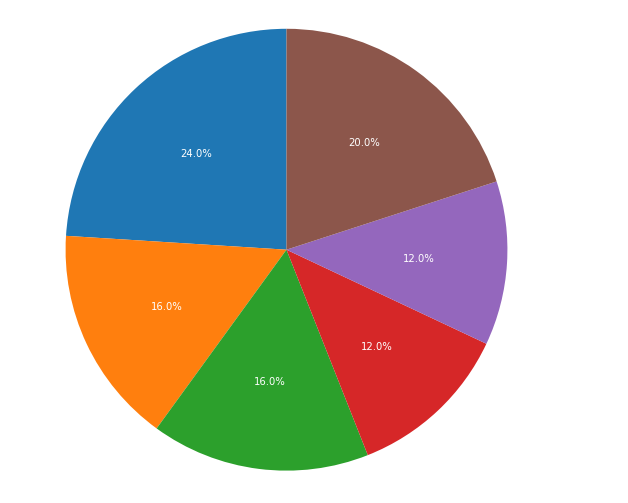

In [4]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = categories
sizes = cal_weights
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, textprops={'color':"w"})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Example for minimization function:
### 10 000$ to be invested
### Required Rate of Return 35%, minimum variance

### RR for each category (Only Use as comparative to make sure we meet the requirements)

In [5]:
amount_to_invest = 10000

rr_bonds = w_bonds * 0.35
rr_tech = w_tech * 0.35
rr_healthcare = w_healthcare * 0.35
rr_realestate = w_realestate * 0.35
rr_industrial = w_industrial * 0.35
rr_consumercyc = w_consumercyc * 0.35

# Read the the right CSVs

In [6]:
cons_cyc = pd.read_csv('selected_stocks_consumer_c.csv')
healthcare = pd.read_csv('selected_stocks_healthcare.csv')
industrial = pd.read_csv('selected_stocks_industrials.csv')
realestate = pd.read_csv('selected_stocks_realestate.csv')
tech = pd.read_csv('selected_stocks_tech.csv')


adjClose_5y = pd.read_csv('../Cleaned_CloseP_5y.csv', index_col='Date')
close_5y = pd.read_csv('../Cleaned_CloseP_5y.csv', index_col='Date')

In [7]:
T_bill_return = quandl.get('USTREASURY/YIELD')['5 YR'][-1]/100

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

## Building function: Test on Technology

In [8]:
# tech

In [9]:
# n = len(adjClose_5y[tech['ticker']].columns)
# log_returns_tech = np.log(adjClose_5y[tech['ticker']] / adjClose_5y[tech['ticker']].shift(1)).dropna() # Same as 1 + stocks_data.pct_change()
# log_returns_tech

In [10]:
# def calculate_vol(weights):
#     annualized_cov = np.dot(log_returns_tech.cov()*252,weights)
#     vol = np.dot(weights.transpose(),annualized_cov)
#     return np.sqrt(vol)
    
# def calculate_returns(weights, log_returns):
#     # Annual log Returns

#     return np.sum(log_returns.mean()*weights) * 252

# def function_to_minimize(weights):

#     # minimize a -1 * SR (that's how the math works here, but it is the same as maximizing SR)
#     return -1 * ((calculate_returns(weights, log_returns_tech) - T_bill_return )/calculate_vol(weights)) 

In [11]:
# bounds = tuple((0,1) for n in range(n))
# constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1})
# equal_weights = n * [1/n] 

In [12]:
# results = minimize(fun=function_to_minimize,
#         x0=equal_weights,
#         bounds=bounds,
#         constraints=constraints)

# results

In [13]:
# # results['x']
# portfolio = {}
# p = 0
# for i in results['x']:
#     print('Put',(i*100).round(3), "% in", log_returns_tech.columns[p])

#     portfolio[log_returns_tech.columns[p]] = (i).round(5)
#     p += 1

In [14]:
# tech_portfolio_w = {}
# for b in portfolio:
#     if portfolio[b] != 0:
#         tech_portfolio_w[b] = portfolio[b]
# tech_portfolio_w

In [15]:
# tech_pf_returns = {}
# for b in tech_portfolio_w.keys():
#     tech_pf_returns[b] = tech[tech['ticker'] == b].iloc[0]['annu_return_5y'].round(5)

# tech_sum_return = sum(tech_portfolio_w[k]*tech_pf_returns[k] for k in tech_portfolio_w)
# tech_weighted_return = w_tech * tech_sum_return


# tech_pf_vol = {}
# for n in tech_portfolio_w.keys():
#     tech_pf_vol[n] = tech[tech['ticker'] == n].iloc[0]['AHV_5y'].round(5)

# tech_sum_var = sum(tech_portfolio_w[k]*tech_pf_vol[k] for k in tech_portfolio_w)
# tech_weighted_volatility = w_tech * tech_sum_var

In [16]:
# print(f"Tech portfolio weights: ", tech_portfolio_w)
# print(f"Tech portfolio returns: ", tech_sum_return)
# print(f"Tech portfolio weighted returns: ", tech_weighted_return)
# print(f"Tech portfolio volatility: ", tech_sum_var)
# print(f"Tech portfolio weighted volatility: ", tech_weighted_volatility)

# ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ---- ----

# Final Function

In [17]:
def sharpe_ratio_min(sector_df, sector_weight, sector_name):
    
    n = len(adjClose_5y[sector_df['ticker']].columns)
    log_ret = np.log(adjClose_5y[sector_df['ticker']] / adjClose_5y[sector_df['ticker']].shift(1)).dropna()

    
    def calculate_vol(weights):
        annualized_cov = np.dot(log_ret.cov()*252,weights)
        vol = np.dot(weights.transpose(),annualized_cov)
        return np.sqrt(vol)
    
    def calculate_returns(weights, log_returns):
        # Annual log Returns

        return np.sum(log_returns.mean()*weights) * 252

    def function_to_minimize(weights):

        # minimize a -1 * SR (that's how the math works here, but it is the same as maximizing SR)
        return -1 * ((calculate_returns(weights, log_ret) - T_bill_return )/calculate_vol(weights)) 


    bounds = tuple((0,1) for n in range(n))
    constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1})
    equal_weights = n * [1/n] 

    results = minimize(fun=function_to_minimize,
        x0=equal_weights,
        bounds=bounds,
        constraints=constraints)
    

    portfolio = {}
    p = 0
    for i in results['x']:
        portfolio[log_ret.columns[p]] = (i).round(5)
        p += 1

    final_portfolio = {}
    for b in portfolio:
        if portfolio[b] != 0:
            final_portfolio[b] = portfolio[b] * sector_weight

    
    pf_returns = {}
    for b in final_portfolio.keys():
        pf_returns[b] = (sector_df[sector_df['ticker'] == b].iloc[0]['annu_return_5y'].round(5))

        pf_returns[b] = pf_returns[b] * final_portfolio[b]


    pf_vol = {}
    for n in final_portfolio.keys():
        pf_vol[n] = (sector_df[sector_df['ticker'] == n].iloc[0]['AHV_5y'].round(5))

        pf_vol[n] = pf_vol[n] * final_portfolio[n]

    pf_sector = {}
    for n in final_portfolio.keys():
        pf_sector[n] = sector_name

    return final_portfolio, pf_returns, pf_vol, results['success'], sector_name, pf_sector

# Technology results

In [18]:
tech_results = sharpe_ratio_min(tech, w_tech, 'Technology')

print("Success: ", tech_results[3])
print("Sector: ", tech_results[4])
print("Technology portfolio weights: ", tech_results[0])
print("Technology portfolio weighted returns: ", tech_results[1])
print("Technology portfolio weighted volatility: ", tech_results[2])


Success:  True
Sector:  Technology
Technology portfolio weights:  {'MGIC': 0.056507999999999996, 'NSIT': 0.0466008, 'ON': 0.0063408, 'TTD': 0.130548}
Technology portfolio weighted returns:  {'MGIC': 0.012865741439999998, 'NSIT': 0.010310426999999999, 'ON': 0.0021798402239999997, 'TTD': 0.12481433184}
Technology portfolio weighted volatility:  {'MGIC': 0.0188793228, 'NSIT': 0.017097833519999998, 'ON': 0.003218970528, 'TTD': 0.08921519772}


# Healthcare Results


In [19]:
healthcare_results = sharpe_ratio_min(healthcare, w_healthcare, 'Healthcare')

print("Success: ", healthcare_results[3])
print("Sector: ", healthcare_results[4])
print("Healthcare portfolio weights: ", healthcare_results[0])
print("Healthcare portfolio weighted returns: ", healthcare_results[1])
print("Healthcare portfolio weighted volatility: ", healthcare_results[2])

Success:  True
Sector:  Healthcare
Healthcare portfolio weights:  {'IDXX': 0.03879520000000001, 'BDSI': 0.0065552000000000015, 'CDMO': 0.015180800000000005, 'ICLR': 0.013921600000000003, 'MEDP': 0.004819200000000001, 'OPRX': 0.03514080000000001, 'RGEN': 0.037627200000000006, 'TNDM': 0.0003936000000000001, 'XOMA': 0.007568000000000002}
Healthcare portfolio weighted returns:  {'IDXX': 0.011298326096000002, 'BDSI': 0.0016167089760000003, 'CDMO': 0.009937655296000002, 'ICLR': 0.0031054913120000006, 'MEDP': 0.0016628649600000005, 'OPRX': 0.028417662144000003, 'RGEN': 0.016869402576000003, 'TNDM': 0.00013918089600000003, 'XOMA': 0.002812041760000001}
Healthcare portfolio weighted volatility:  {'IDXX': 0.011839131184000002, 'BDSI': 0.003709522128000001, 'CDMO': 0.010448185600000003, 'ICLR': 0.004134158336000001, 'MEDP': 0.0024005880960000004, 'OPRX': 0.023860603200000007, 'RGEN': 0.015626952432000005, 'TNDM': 0.00031149504000000007, 'XOMA': 0.005214957440000002}


# Real Estate results

In [20]:
realestate_results = sharpe_ratio_min(realestate, w_realestate, 'Real Estate')

print("Success: ", realestate_results[3])
print("Sector: ", realestate_results[4])
print("Real Estate portfolio weights: ", realestate_results[0])
print("Real Estate portfolio weighted returns: ", realestate_results[1])
print("Real Estate portfolio weighted volatility: ", realestate_results[2])

Success:  True
Sector:  Real Estate
Real Estate portfolio weights:  {'CBRE': 0.05149440000000001, 'SBAC': 0.10850560000000002}
Real Estate portfolio weighted returns:  {'CBRE': 0.012567723264000002, 'SBAC': 0.025745123712000006}
Real Estate portfolio weighted volatility:  {'CBRE': 0.018085863168000003, 'SBAC': 0.029036098560000008}


# Industrial results


In [21]:
industrial_results = sharpe_ratio_min(industrial, w_industrial, 'Industrial')

print("Success: ", industrial_results[3])
print("Sector: ", industrial_results[4])
print("Industrial portfolio weights: ", industrial_results[0])
print("Industrial portfolio weighted returns: ", industrial_results[1])
print("Industrial portfolio weighted volatility: ", industrial_results[2])

Success:  True
Sector:  Industrial
Industrial portfolio weights:  {'ODFL': 0.0625008, 'GLDD': 0.0005364, 'HSON': 0.006387599999999999, 'KRNT': 0.006606, 'QRHC': 0.0051827999999999996, 'RCII': 0.002574, 'SAIA': 0.00017399999999999997, 'SBLK': 0.0024971999999999998, 'TRNS': 0.03354119999999999}
Industrial portfolio weighted returns:  {'ODFL': 0.023916556127999998, 'GLDD': 0.00011948310000000001, 'HSON': 0.001119682404, 'KRNT': 0.00259193016, 'QRHC': 0.001266054384, 'RCII': 0.00075683322, 'SAIA': 6.933203999999998e-05, 'SBLK': 0.0006747184679999999, 'TRNS': 0.015341074055999998}
Industrial portfolio weighted volatility:  {'ODFL': 0.018625863407999998, 'GLDD': 0.000218363076, 'HSON': 0.0030150749519999996, 'KRNT': 0.0033730236000000004, 'QRHC': 0.003653407548, 'RCII': 0.00123644664, 'SAIA': 6.925721999999999e-05, 'SBLK': 0.00145911396, 'TRNS': 0.014215431383999996}


# Consumer Cyclical resulsts

In [22]:
consumercyc_results = sharpe_ratio_min(cons_cyc, w_consumercyc, 'Consumer Cyclical')

print("Success: ", consumercyc_results[3])
print("Sector: ", consumercyc_results[4])
print("Consumer Cyclical portfolio weights: ", consumercyc_results[0])
print("Consumer Cyclical portfolio weighted returns: ", consumercyc_results[1])
print("Consumer Cyclical portfolio weighted volatility: ", consumercyc_results[2])

Success:  True
Sector:  Consumer Cyclical
Consumer Cyclical portfolio weights:  {'HLT': 0.001614, 'TSLA': 0.03757799999999999, 'CHDN': 0.0094296, 'CLAR': 0.0254616, 'FIVE': 0.0049644, 'FOXF': 0.0099468, 'LULU': 0.031003199999999995}
Consumer Cyclical portfolio weighted returns:  {'HLT': 0.00033869790000000004, 'TSLA': 0.027792313019999994, 'CHDN': 0.0033731565119999997, 'CLAR': 0.007807545024000001, 'FIVE': 0.0016508119319999998, 'FOXF': 0.003657239424, 'LULU': 0.011201456159999998}
Consumer Cyclical portfolio weighted volatility:  {'HLT': 0.00050779668, 'TSLA': 0.022966170479999996, 'CHDN': 0.004043035296, 'CLAR': 0.010019903448, 'FIVE': 0.002248476048, 'FOXF': 0.004601588616, 'LULU': 0.012179917151999998}


# Bonds Results

In [23]:
bonds_weights = {'Bonds' : w_bonds}
bonds_returns = {'Bonds' : w_bonds * T_bill_return}
bonds_volatility = {'Bonds': 0}
bonds_sector = {'Bonds': 'Bonds'}

print(f"Bonds portfolio weight: ", bonds_weights)
print(f"Bonds portfolio weighted returns: ", bonds_returns)
print(f"Bonds portfolio weighted volatility: ", bonds_volatility)

Bonds portfolio weight:  {'Bonds': 0.2}
Bonds portfolio weighted returns:  {'Bonds': 0.0035600000000000002}
Bonds portfolio weighted volatility:  {'Bonds': 0}


# Final results

In [24]:
complete_PF_weights = tech_results[0] | healthcare_results[0] | realestate_results[0] | industrial_results[0] | consumercyc_results[0] | bonds_weights
complete_PF_returns = tech_results[1] | healthcare_results[1] | realestate_results[1] | industrial_results[1] | consumercyc_results[1] | bonds_returns
complete_PF_volatility = tech_results[2] | healthcare_results[2] | realestate_results[2] | industrial_results[2] | consumercyc_results[2] | bonds_volatility
complete_PF_sectors = tech_results[5] | healthcare_results[5] | realestate_results[5] | industrial_results[5] | consumercyc_results[5] | bonds_sector

In [25]:
compelete_PF_DF = pd.DataFrame.from_dict(complete_PF_weights, orient='index')
compelete_PF_DF.rename(columns={0:'weights'}, inplace=True)
compelete_PF_DF['returns'] = compelete_PF_DF.index.map(complete_PF_returns)
compelete_PF_DF['volatility'] = compelete_PF_DF.index.map(complete_PF_volatility)
compelete_PF_DF['sectors'] = compelete_PF_DF.index.map(complete_PF_sectors)
compelete_PF_DF['Example: 10k'] = compelete_PF_DF['weights'] * amount_to_invest

In [26]:
sum_df = pd.DataFrame({'weights': [sum(compelete_PF_DF['weights'])],
                    'returns' : [sum(compelete_PF_DF['returns'])],
                    'volatility' : [sum(compelete_PF_DF['volatility'])],
                    'Example: 10k' : [sum(compelete_PF_DF['Example: 10k'])]})

sum_df

,weights,returns,volatility,Example: 10k
0,0.999997,0.369579,0.355512,9999.968


In [27]:
compelete_PF_DF

,weights,returns,volatility,sectors,Example: 10k
MGIC,0.056508,0.012866,0.018879,Technology,565.080
NSIT,0.046601,0.010310,0.017098,Technology,466.008
ON,0.006341,0.002180,0.003219,Technology,63.408
TTD,0.130548,0.124814,0.089215,Technology,1305.480
IDXX,0.038795,0.011298,0.011839,Healthcare,387.952
BDSI,0.006555,0.001617,0.003710,Healthcare,65.552
CDMO,0.015181,0.009938,0.010448,Healthcare,151.808
ICLR,0.013922,0.003105,0.004134,Healthcare,139.216
MEDP,0.004819,0.001663,0.002401,Healthcare,48.192
OPRX,0.035141,0.028418,0.023861,Healthcare,351.408


In [35]:
compelete_PF_DF.to_csv("Agressive_80_20_weights.csv")

# Ploting sandbox

In [28]:
all_label = list(compelete_PF_DF.sectors.unique())
labels = list(compelete_PF_DF.sectors.unique()[:-1])
print(all_label)
print(labels)

['Technology', 'Healthcare', 'Real Estate', 'Industrial', 'Consumer Cyclical', 'Bonds']
['Technology', 'Healthcare', 'Real Estate', 'Industrial', 'Consumer Cyclical']


In [29]:
sector_values = [[] for _ in range(len(labels))]
sector_values[0] = sorted(list(tech_results[0].values()))
sector_values[1] = sorted(list(healthcare_results[0].values()))
sector_values[2] = sorted(list(realestate_results[0].values()))
sector_values[3] = sorted(list(industrial_results[0].values()))
sector_values[4] = sorted(list(consumercyc_results[0].values()))

In [30]:
sector_tickers = [[] for _ in range(len(labels))]
sector_tickers[0] = sorted(list(tech_results[0].keys()))
sector_tickers[1] = sorted(list(healthcare_results[0].keys()))
sector_tickers[2] = sorted(list(realestate_results[0].keys()))
sector_tickers[3] = sorted(list(industrial_results[0].keys()))
sector_tickers[4] = sorted(list(consumercyc_results[0].keys()))

In [31]:
sector_full_weights = []
sector_full_weights.append(w_tech)
sector_full_weights.append(w_healthcare)
sector_full_weights.append(w_realestate)
sector_full_weights.append(w_industrial)
sector_full_weights.append(w_consumercyc)
sector_full_weights.append(w_bonds)

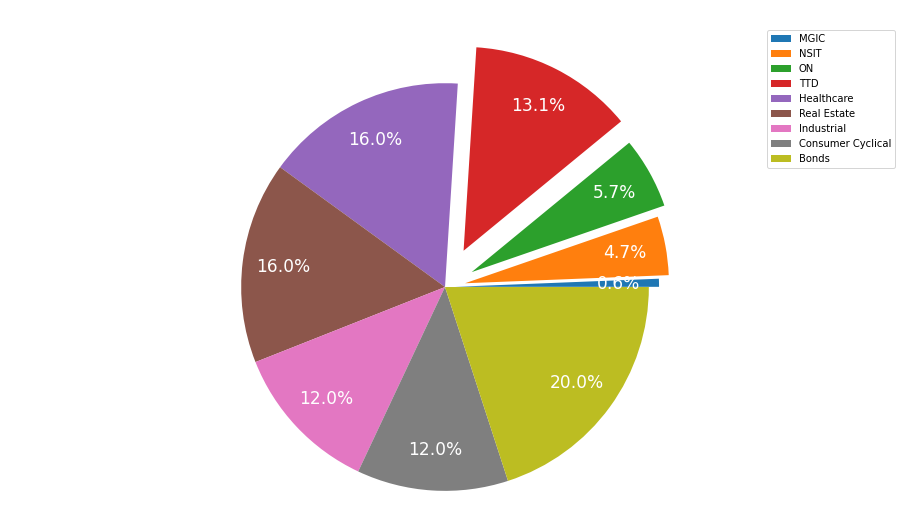

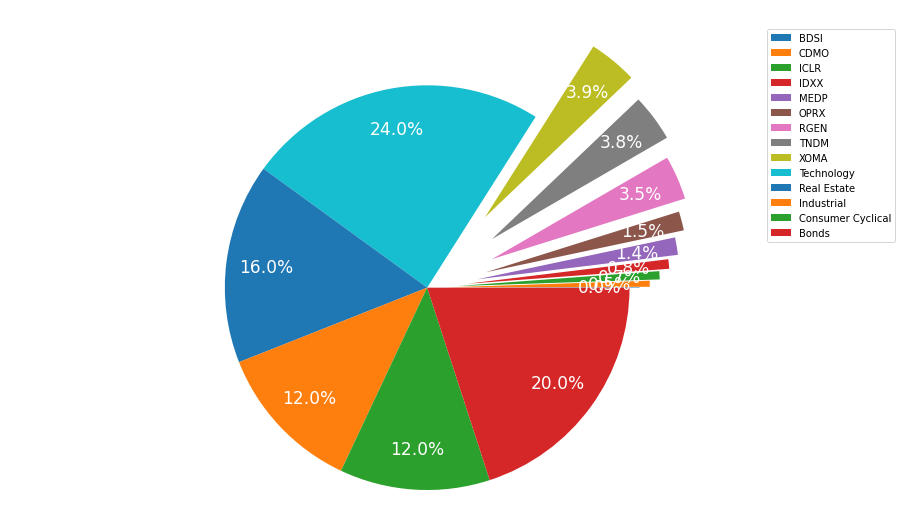

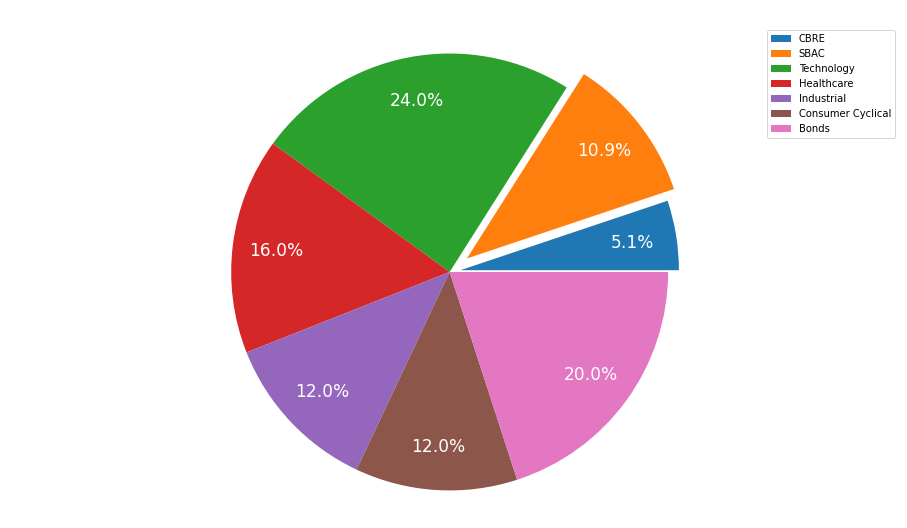

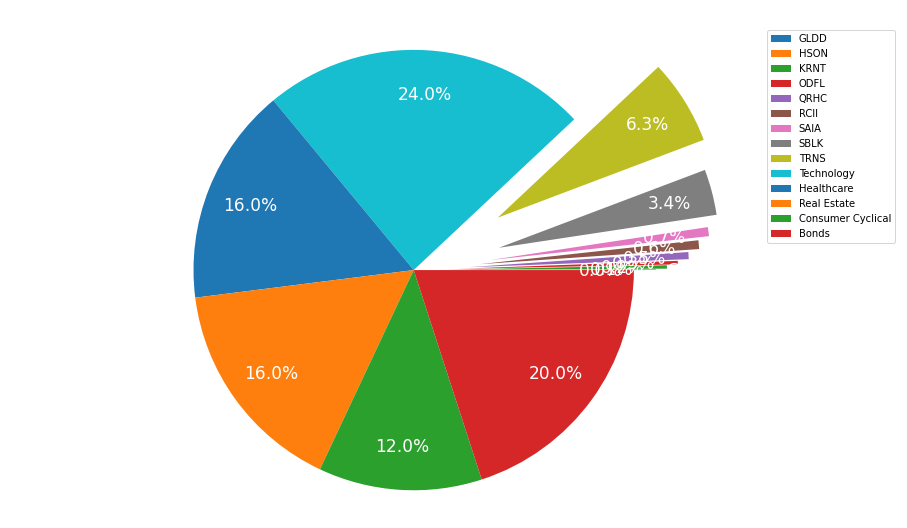

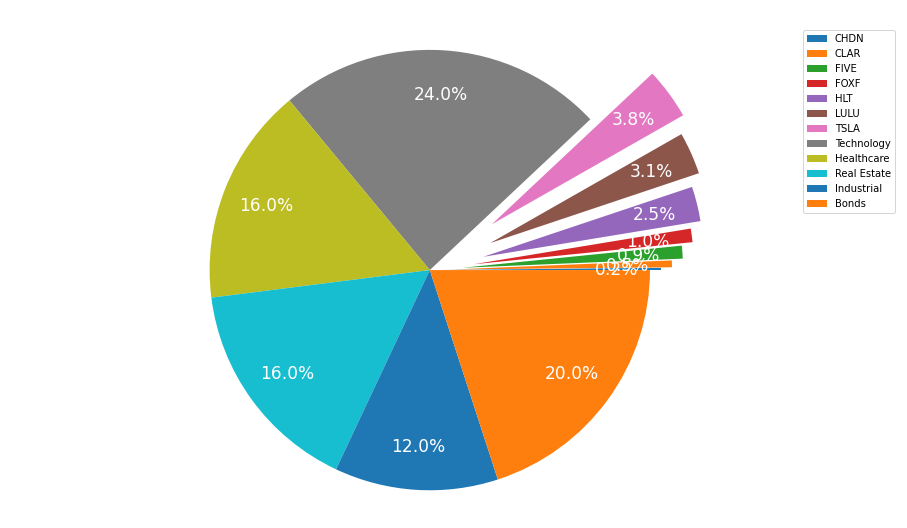

In [32]:
for i, s in enumerate(labels):

    sec_w = sector_full_weights.copy()
    sec_label = all_label.copy()
    
    sec_w.pop(i)
    sec_label.pop(i)

    counts = pd.Series(sector_values[i] + sec_w, 
                    index= sector_tickers[i] + sec_label)

    explode = tuple((0.05 + 0.05*n) for n in range(len(sector_values[i]))) + tuple((0) for n in range(len(sec_w)))

    counts.plot(figsize=(16,9), kind='pie', fontsize=17, explode=explode, textprops={'color':"w"},  autopct='%1.1f%%', pctdistance=0.8)
    plt.axis('equal')
    plt.ylabel('')
    plt.title(s + ' Breakdown',  fontsize=15, color= 'w', fontweight='bold')
    plt.legend(labels=counts.index, loc="best")
    plt.show()